In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv

%matplotlib inline

In [7]:
!ls

Datasets
ML_Project_KM.ipynb
README.MD
Wenchang_Qian_Kaggle_Ames_Iowa_Housing_Price_Prediction.ipynb
james_proj3.ipynb


In [8]:
#house_train = pd.read_csv('Datasets/train.csv');
#print('Training Data:', house_train.shape);
#house_test = pd.read_csv('Datasets/test.csv');
#print('Test Data:', house_test.shape);
#house_train.describe().T

In [9]:
house_train = pd.read_csv('Datasets/train_j.csv');
print('Training Data:', house_train.shape);
house_test = pd.read_csv('Datasets/test_j.csv');
print('Test Data:', house_test.shape);
#house_train.describe().T

Training Data: (1460, 75)
Test Data: (1459, 73)


In [10]:
house_train = house_train.drop([house_train.columns[0]], axis=1)
print('Training Data:', house_train.shape);
house_test = house_test.drop([house_test.columns[0]], axis=1)
print('Test Data:', house_test.shape);
house_train.describe().T

Training Data: (1460, 74)
Test Data: (1459, 72)


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1460.0,69.876712,22.778424,21.000000,60.000000,70.000000,80.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
MasVnrArea,1460.0,103.482877,180.888339,0.000000,0.000000,0.000000,165.250000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000
BsmtUnfSF,1460.0,567.240411,441.866955,0.000000,223.000000,477.500000,808.000000,2336.000000


In [11]:
house_test.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,57.316655,42.678012,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,68.747772,21.176526,21.0,60.0,68.0,80.0,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.0,9399.0,11517.5,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.0,1973.0,2001.0,2010.0
MasVnrArea,1459.0,100.046607,176.972495,0.0,0.0,0.0,162.5,1290.0
BsmtFinSF1,1459.0,438.902673,455.257119,0.0,0.0,350.0,752.0,4010.0
BsmtFinSF2,1459.0,52.583276,176.698671,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,1459.0,554.375600,437.121370,0.0,219.5,460.0,797.5,2140.0


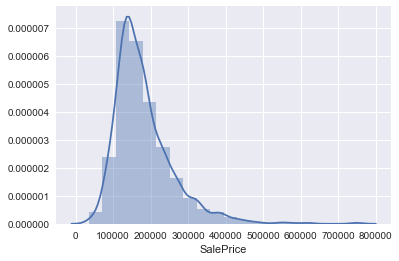

In [12]:
# Distribution of house sales price
sns.distplot(house_train.SalePrice, bins = 20)

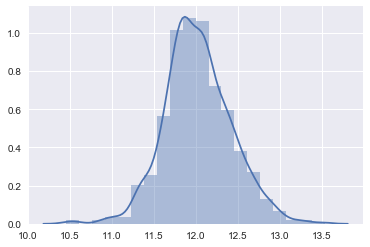

In [13]:
# Distribution of log(Price)
sns.distplot([np.log(house_train.SalePrice + 1)], bins = 20)

In [14]:
# Going to plot correlation between fields of numeric values
house_train_numeric = house_train[\
    house_train.select_dtypes(include=['float64','int64']).columns.values];
corr_train = house_train_numeric.corr();

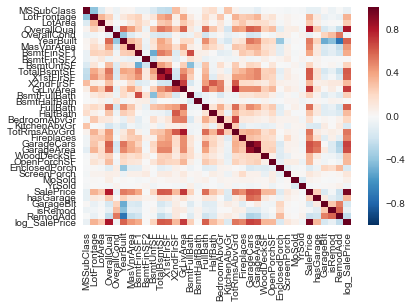

In [15]:
sns.heatmap(corr_train)
sns.set(font_scale = .35)

In [16]:
sns.set(style="ticks", color_codes=True)

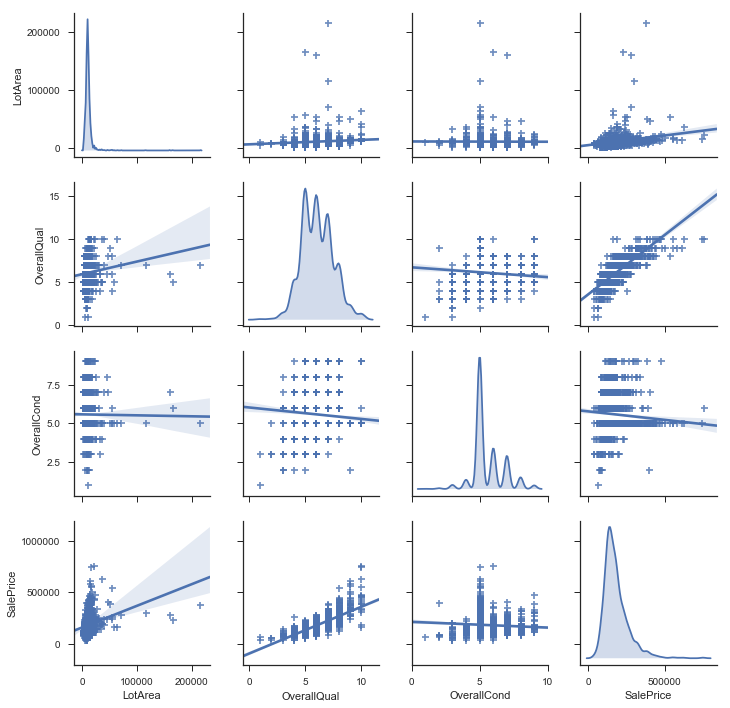

In [17]:
# scatter plot of various features

# It taxes the computer very much to do the plot.
# Here I only plotted scatter plot between FOUR numeric features
# We can add more features if we want later on

sns.pairplot(house_train_numeric[['LotArea',\
                                  'OverallQual',\
                                  'OverallCond',\
                                  'SalePrice']],\
             diag_kind='kde', kind = 'reg',\
             markers='+', diag_kws=dict(shade=True));
sns.set(font_scale = 1.5)

In [18]:
# Zero bedroom or zero garage parking spaces or zero bathroom may give trouble
# to derived features such as bath/bed
# Need to think about a way to walk around this

print('Num of houses with Zero Bedroom:', sum(house_train.BedroomAbvGr==0))
print('Num of houses with Zero Garage Parking:', sum(house_train.GarageCars==0))
print('Num of houses with Zero Full Bath:', sum(house_train.FullBath==0))
print('Num of houses with Zero Half Bath:', sum(house_train.HalfBath==0))
print('Num of houses with Neither Half Nor Full Bath:', sum((house_train.HalfBath==0) & (house_train.FullBath==0)))

Num of houses with Zero Bedroom: 6
Num of houses with Zero Garage Parking: 81
Num of houses with Zero Full Bath: 9
Num of houses with Zero Half Bath: 913
Num of houses with Neither Half Nor Full Bath: 3
